# Import libraries

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import  train_test_split

# Exercise 1

# 1 - 1 Load the data

In [2]:
df1 = pd.read_csv('diabetes.csv')

In [3]:
df1.head(2)

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0


# 1 - 2 Missing value denoted by 0 in chosen columns

In [4]:
columns = ['Glucose', 'BloodPressure', 'SkinThickness', 'Insulin', 'BMI']
missing_vals_dict = (df1[columns] == 0).sum().to_dict()
missing_vals_dict

{'Glucose': 5,
 'BloodPressure': 35,
 'SkinThickness': 227,
 'Insulin': 374,
 'BMI': 11}

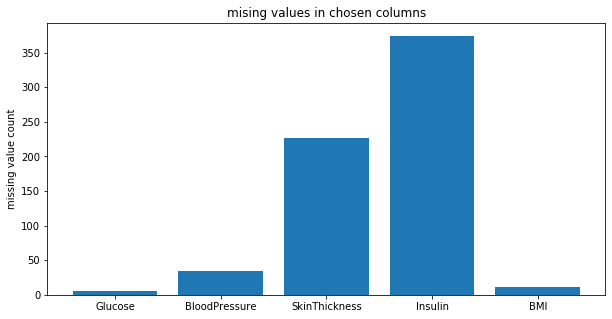

In [5]:
from pylab import rcParams
rcParams['figure.figsize'] = 10, 5
plt.bar(missing_vals_dict.keys(), missing_vals_dict.values())
plt.title("mising values in chosen columns")
plt.ylabel("missing value count")
plt.show()

# 1 - 3 plot of histogram for missing values as 0 and missing values as NaN

In [6]:
def get_new_dataframe(column, df):
    array_with_zero = df[column].values
    array_with_nan = np.where(array_with_zero==0, np.nan, array_with_zero)
    new_array = np.vstack((array_with_zero, array_with_nan)).T
    df = pd.DataFrame(new_array, columns=["with zero", "with Nan"])
    return df

In [7]:
dfs = [get_new_dataframe(column, df1[columns]) for column in columns]

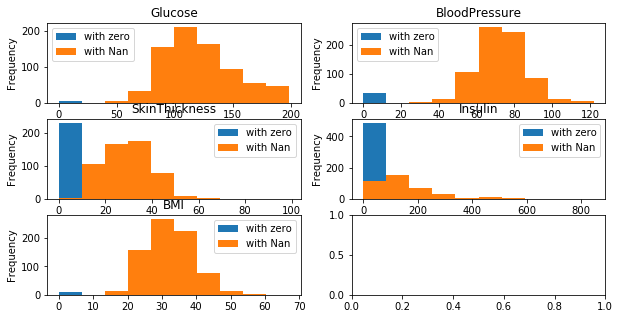

In [8]:
fig, axes = plt.subplots(3, 2)
rcParams['figure.figsize'] = 25, 10
dfs[0].plot.hist(title=columns[0], ax=axes[0, 0])
dfs[1].plot.hist(title=columns[1], ax=axes[0, 1])
dfs[2].plot.hist(title=columns[2], ax=axes[1, 0])
dfs[3].plot.hist(title=columns[3], ax=axes[1, 1])
dfs[4].plot.hist(title=columns[4], ax=axes[2, 0])

The zeros are being taking in account, while the NaN values are not being takng into account whle plotting the histogram.

# 1 - 4 split data into train (0.6), validation (0.2) and test (0.2)

In [9]:
# replace 0 by NaN
df1_new = df1[columns].replace(to_replace=0, value=np.nan)


y = df1['Outcome']
X = df1_new

# split data
test_size = 0.2; valid_size = 0.2; train_size = 0.6; train_temp_size = valid_size + train_size
# split in  temporarely train (80%), test (20 %) first 
X_train_temp, X_test, y_train_temp, y_test = train_test_split(X, y, test_size=test_size, random_state=1,
                                                             shuffle=False)
# split in 20 % validation and 60 % train
X_train, X_validation, y_train, y_validation = train_test_split(X_train_temp, y_train_temp, 
                                                                test_size=(valid_size/train_temp_size), 
                                                                random_state=14, shuffle=True)

# 1- 5 Missing values imputation

In [10]:
from sklearn.impute import SimpleImputer 
from sklearn.pipeline import Pipeline
from sklearn.neighbors import KNeighborsClassifier

To evaluate which imputation strategy is the best, the average of the validation score for each strategy is computed for
'n_neighbors' varying from 1 to 10

In [11]:
knn_classifier = KNeighborsClassifier(n_neighbors=3)
strategies = ['mean', 'median', 'most_frequent']

valid_scores = {}
temp = {}
for neighbor in range(1, 11):
    for strategy in strategies:
        imputer=SimpleImputer(missing_values=np.nan,strategy=strategy)
        pipeline = Pipeline([
                    ('imputer', imputer),
                    ('classifier', KNeighborsClassifier(n_neighbors=neighbor))
        ])
        pipeline.fit(X_train, y_train)
        valid_score = pipeline.score(X_validation, y_validation)
        temp[strategy] = valid_score
    valid_scores[neighbor] = temp
    temp = {}
        

valid_scores

{1: {'mean': 0.6558441558441559,
  'median': 0.6688311688311688,
  'most_frequent': 0.6363636363636364},
 2: {'mean': 0.7337662337662337,
  'median': 0.7337662337662337,
  'most_frequent': 0.7077922077922078},
 3: {'mean': 0.7337662337662337,
  'median': 0.7467532467532467,
  'most_frequent': 0.7272727272727273},
 4: {'mean': 0.7142857142857143,
  'median': 0.7467532467532467,
  'most_frequent': 0.7532467532467533},
 5: {'mean': 0.7077922077922078,
  'median': 0.7337662337662337,
  'most_frequent': 0.7532467532467533},
 6: {'mean': 0.7142857142857143,
  'median': 0.7272727272727273,
  'most_frequent': 0.7337662337662337},
 7: {'mean': 0.7207792207792207,
  'median': 0.7272727272727273,
  'most_frequent': 0.7467532467532467},
 8: {'mean': 0.7207792207792207,
  'median': 0.7402597402597403,
  'most_frequent': 0.7532467532467533},
 9: {'mean': 0.7337662337662337,
  'median': 0.7402597402597403,
  'most_frequent': 0.7467532467532467},
 10: {'mean': 0.7272727272727273,
  'median': 0.7467532

In [12]:
from statistics import mean 
median_scores = []; mean_scores = []; most_frequent_scores = []
for k, score_dict in valid_scores.items():
    median_scores.append(score_dict['median'])
    mean_scores.append(score_dict['mean'])
    most_frequent_scores.append(score_dict['most_frequent'])
    

average_mean_strategy_score = round(mean(mean_scores), 3)
average_median_strategy_score = round(mean(median_scores), 3)
average_most_freq_score = round(mean(most_frequent_scores), 3)

In [13]:
print(f"Average mean strategy validation score {average_mean_strategy_score}")
print(f"Average median strategy validation score {average_median_strategy_score}")
print(f"Average most frequent strategy validation score {average_most_freq_score}")

Average mean strategy validation score 0.716
Average median strategy validation score 0.731
Average most frequent strategy validation score 0.732


The best imputation strategy is the most_frequent

# 1 - 6 fit a logistic regression classifier with median as imputation strategy

In [14]:
from sklearn.linear_model import LogisticRegression

In [15]:
logit_classifier = LogisticRegression(random_state=11)
imputer=SimpleImputer(missing_values=np.nan,strategy='most_frequent')
pipeline = Pipeline([
                    ('imputer', imputer),
                    ('classifier', logit_classifier)
        ])
pipeline.fit(X_train, y_train)
score = pipeline.score(X_test, y_test)
print(f"Test score for logistic regression with median as imputation strategy: {round(score, 3)}")

Test score for logistic regression with median as imputation strategy: 0.727


# Exercise 2

# 2 - 1 load the data

In [16]:
df2 = pd.read_csv('titanic.csv')

In [17]:
df2.head(2)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C


# 2 - 2  add title columns to the dataframe

In [18]:
import re
string = "Braund, Mr. Owen Harris, Lady. Margrett"
pattern = r'[A-Za-z]+\.'
finder = re.findall(pattern, string)

df2 = df2.assign(
    title=df2.Name.apply(lambda s: re.findall(pattern, s)[0])
)

In [19]:
df2

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,title
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,Mr.
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,Mrs.
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,Miss.
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,Mrs.
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,Mr.
...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S,Rev.
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S,Miss.
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S,Miss.
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C,Mr.


# 2 - 3 plot bar plot of number of different titles

In [20]:
df23 = df2[['PassengerId','title']].groupby('title').count().rename(columns={'PassengerId': 'title_count'})
df23

,title_count
title,
Capt.,1
Col.,2
Countess.,1
Don.,1
Dr.,7
Jonkheer.,1
Lady.,1
Major.,2
Master.,40


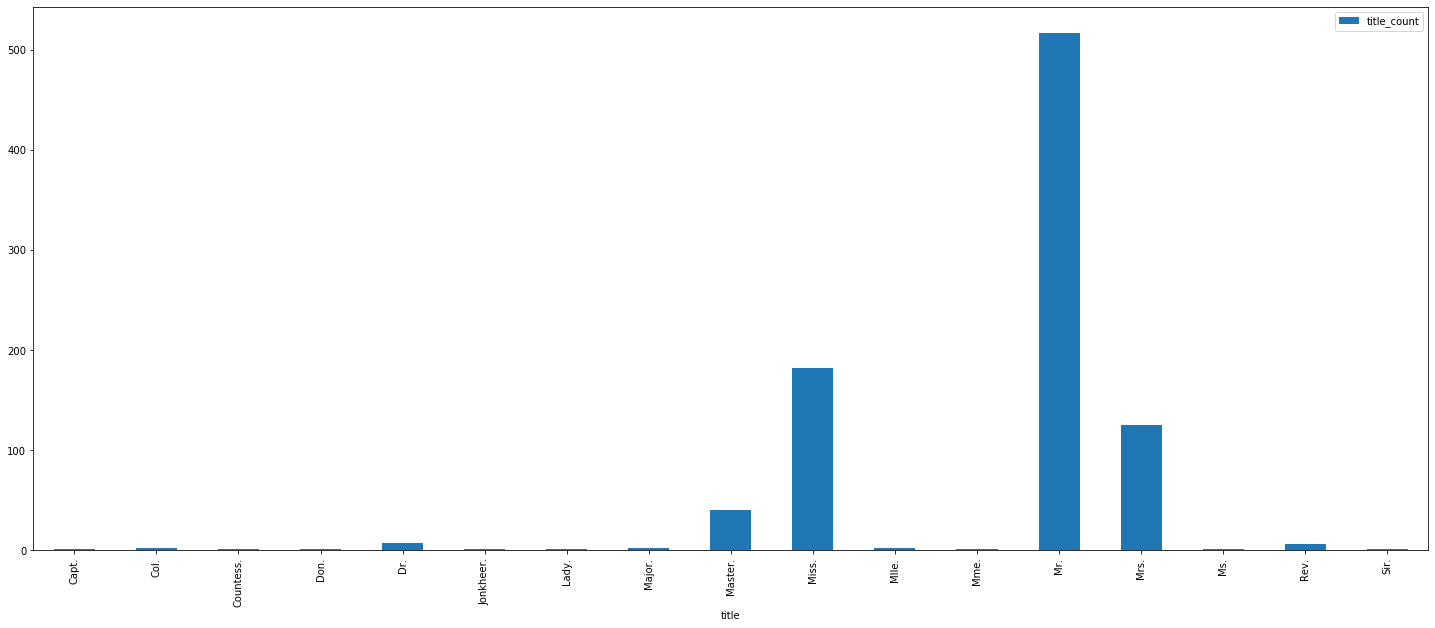

In [21]:
df23.plot(kind='bar')
plt.show()

# 2 - 4 rearrange title


In [22]:
valid_titles = ["Master.", "Miss.", "Mr.", "Mrs."]
all_titles = list(df23.index)
all_titles

['Capt.',
 'Col.',
 'Countess.',
 'Don.',
 'Dr.',
 'Jonkheer.',
 'Lady.',
 'Major.',
 'Master.',
 'Miss.',
 'Mlle.',
 'Mme.',
 'Mr.',
 'Mrs.',
 'Ms.',
 'Rev.',
 'Sir.']

In [23]:
other_titles = list( set(all_titles) - set(valid_titles)) 
other_titles

['Rev.',
 'Capt.',
 'Ms.',
 'Dr.',
 'Don.',
 'Mlle.',
 'Jonkheer.',
 'Countess.',
 'Lady.',
 'Col.',
 'Major.',
 'Sir.',
 'Mme.']

In [24]:
df24 = df2.replace(to_replace=other_titles, value='Other')
df24

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,title
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,Mr.
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,Mrs.
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,Miss.
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,Mrs.
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,Mr.
...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S,Other
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S,Miss.
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S,Miss.
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C,Mr.


In [25]:
new_titles = df24[['PassengerId','title']].groupby('title').count().rename(columns={'PassengerId': 'title_count'})
new_titles

,title_count
title,
Master.,40
Miss.,182
Mr.,517
Mrs.,125
Other,27


# 2 - 5 Average survival rate based on title

In [26]:
df25 = df24[['PassengerId', 'Survived', 'title']]
df25.head()

,PassengerId,Survived,title
0,1,0,Mr.
1,2,1,Mrs.
2,3,1,Miss.
3,4,1,Mrs.
4,5,0,Mr.


In [27]:
df_count_survived = df25.groupby(['title', 'Survived']) \
                        .count() \
                        .rename(columns={'PassengerId':'count'}) 
df_count_survived

count
title   Survived       
Master. 0            17
        1            23
Miss.   0            55
        1           127
Mr.     0           436
        1            81
Mrs.    0            26
        1            99
Other   0            15
        1            12

In [28]:
titles = list(new_titles.index)
container = {}
for title in titles:
    df_survived = df_count_survived.loc[title]/df_count_survived.loc[title].sum().values[0]
    survival = df_survived.to_dict()
    survival[title] = survival.pop('count')
    container[title] = survival[title]
container

{'Master.': {0: 0.425, 1: 0.575},
 'Miss.': {0: 0.3021978021978022, 1: 0.6978021978021978},
 'Mr.': {0: 0.8433268858800773, 1: 0.15667311411992263},
 'Mrs.': {0: 0.208, 1: 0.792},
 'Other': {0: 0.5555555555555556, 1: 0.4444444444444444}}

In [29]:
values = list(map(lambda s: container[s][1], list(container.keys())  ))


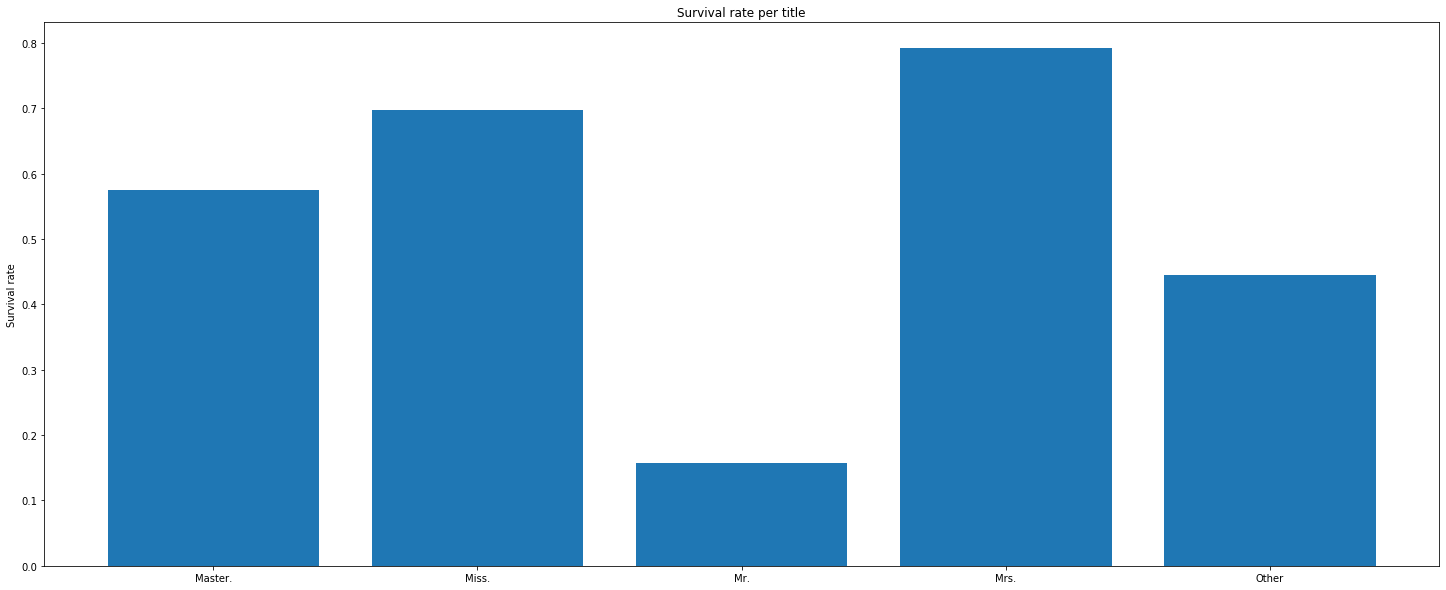

In [30]:
plt.bar(titles, values)
plt.ylabel('Survival rate')
plt.title('Survival rate per title')
plt.show()

In [31]:
df_count_per_title = df25.groupby(['title']) \
                         .count() \
                         .drop('PassengerId', axis=1) \
                         .rename(columns={'Survived':'count'})
df_count_per_title

,count
title,
Master.,40
Miss.,182
Mr.,517
Mrs.,125
Other,27


# 2 - 6 numerical encode the titles

In [32]:
titles = list(new_titles.index)
titles

['Master.', 'Miss.', 'Mr.', 'Mrs.', 'Other']

In [33]:
title_mapping = dict(zip(titles, range(1,len(titles)+1)))
title_mapping

{'Master.': 1, 'Miss.': 2, 'Mr.': 3, 'Mrs.': 4, 'Other': 5}

In [34]:
df25 = df24.replace(title_mapping)
df25

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,title
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,3
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,4
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,2
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,4
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S,5
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S,2
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S,2
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C,3


# 2 - 7 classification

#### Ticket fare as input feature only

In [35]:
X = df25['Fare'].values.reshape(-1,1)
y = df25['Survived']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1,
                                                             shuffle=True)
clf = KNeighborsClassifier(n_neighbors=3)
clf.fit(X_train, y_train)
score = clf.score(X_test, y_test)
print(f"score: {score}")

score: 0.6480446927374302


#### Ticket fare and title as input feature only

In [36]:
X = df25[['Fare', 'title']]
y = df25['Survived']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1,
                                                             shuffle=True)
clf = KNeighborsClassifier(n_neighbors=3)
clf.fit(X_train, y_train)
score = clf.score(X_test, y_test)
print(f"score: {score}")

score: 0.7486033519553073


#### The accuracy is much higer for  'Fare', 'title' as input features then for 'fare' only